#**Capstone Project**

## ***Childhood Autistic Spectrum Disorder Screening using Machine Learning***

### **Project designed and executed by Mukkul Kurwa**

The early diagnosis of neurodevelopment disorders can improve treatment and significantly decrease the associated healthcare costs. In this project, we will use supervised learning to diagnose Autistic Spectrum Disorder (ASD) based on behavioural features and individual characteristics. More specifically, we will build and deploy a neural network using the Keras API.

This project will use a dataset provided by the UCI Machine Learning Repository that contains screening data for 292 patients. The dataset can be found at the following URL: https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++

**Abstract:** Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Child) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

## **Let's begin with preparing our data set**

### **Import Datasets**

I start by importing the 'Autism-Child-Data.csv' file into a Pandas dataframe and take a look at it.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv('Autism-Child-Data.csv')
display(data.head(n=5))

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [2]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 292
Individuals diagonised with ASD: 141
Individuals not diagonised with ASD: 151
Percentage of individuals diagonised with ASD: 48.29%


**Featureset Exploration**

This data contains 292 instances, and contains the following attributes:

* **age**: number (Age in years).
* **gender**: String [Male/Female].
* **ethnicity**: String (List of common ethnicities in text format).
* **Born with jaundice**: Boolean [yes or no].
* **Family member with PDD**: Boolean [yes or no].
* **Who is completing the test**: String [Parent, self, caregiver, medical staff, clinician ,etc.].
* **Country of residence** : String (List of countries in text format).
* **Used the screening app before** : Boolean [yes or no] (Whether the user has used a screening app)
* **Screening Method Type**: Integer [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult).
* **Question 1-10 Answer**: Binary [0, 1] (The answer code of the question based on the screening method used).
* **Screening Score**: Integer (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).

## Preparing the Data
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [3]:
data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


There are quite a few missing values in the data set. Before I just drop every row that's missing data, I make sure not to bias the data in any way. In other words we need to make sure that there does not appear to be any sort of correlation to what sort of data has missing fields. If there were, I'd have to try and go back and fill that data in.

Since the missing data seems randomly distributed, I go ahead and drop rows with missing data.

In [4]:
data.dropna(inplace=True)
data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


**If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.**

In [0]:
#_data.median()
#numerical = ['age', 'result']
#data.fillna(data[numerical].median())
#data.describe()

Let's check out the data types of all our features including the target feature. Moreover, lets count the total number of instances and the target-class distribution.

In [6]:
# Reminder of the features:
print(data.dtypes)

# Total number of records in clean dataset
n_records = len(data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))

id                  int64
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object
Total number of records: 292
Individuals diagonised with ASD: 141
Individuals not diagonised with ASD: 151


## **A quick visualization with Seaborn**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


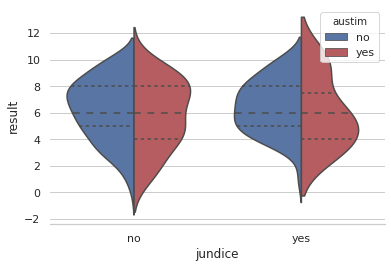

In [8]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=data, split=True, inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

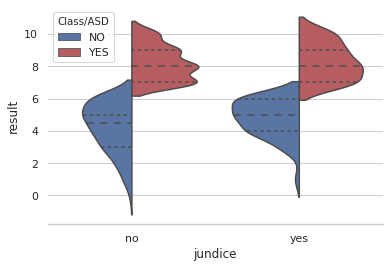

In [9]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=data, split=True, inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

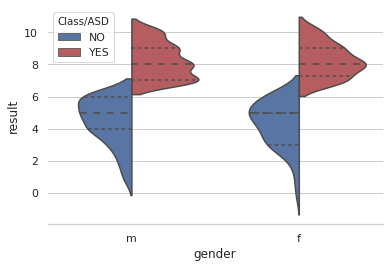

In [10]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=data, split=True, inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


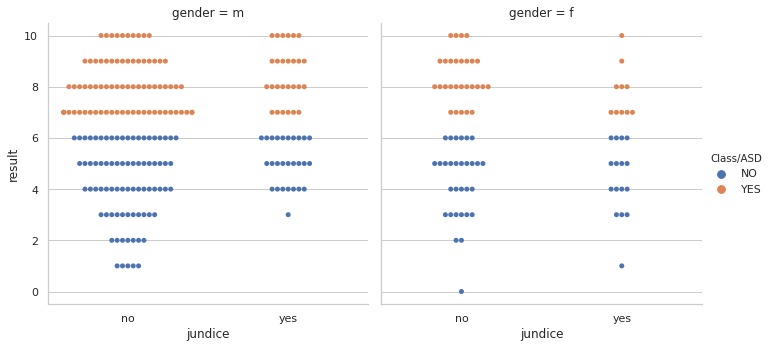

In [11]:
sns.factorplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=data, kind="swarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


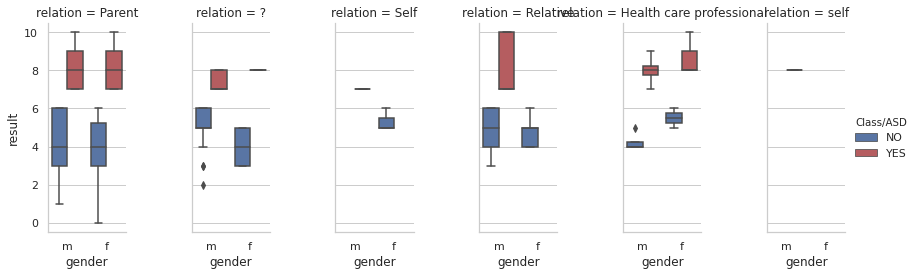

In [12]:
sns.factorplot(x="gender", y="result", hue="Class/ASD", col="relation", data=data, kind="box", size=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


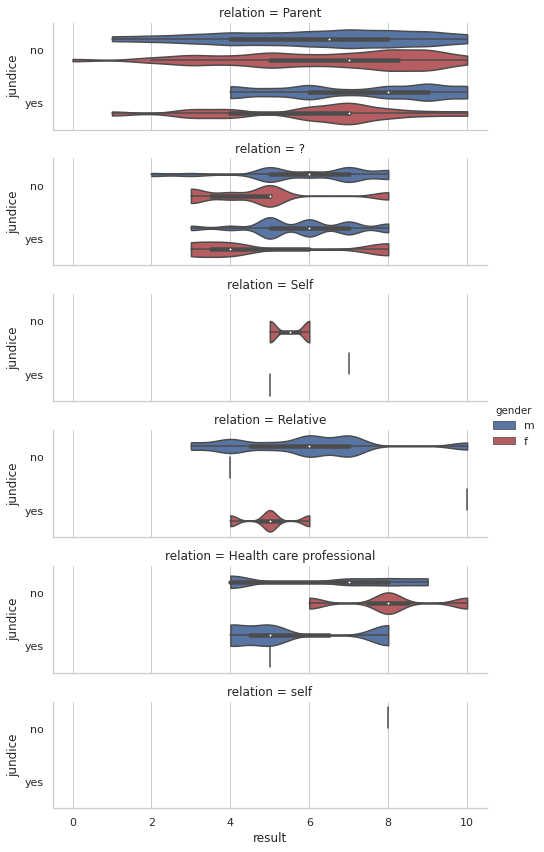

In [13]:
g = sns.factorplot(x="result", y="jundice", hue="gender", row="relation", data=data, orient="h", size=2, aspect=3.5, palette={'f': "r", 'm': "b"}, kind="violin", dodge=True, cut=0, bw=.2)

In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. Both of the occasions I have used factorplot module from seaborn visualization software. In the first case, I used 'swamp' kind of graph expressing the relationship between several different features present in the data whereas in the second case, 'box' method was used to present the visual way of showing how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).

## **Data Preprocessing**
This dataset is going to require multiple preprocessing steps. First, we have columns in our DataFrame (attributes) that we don't want to use when training our neural network. We will drop these columns first. Secondly, much of our data is reported using strings; as a result, we will convert our data to categorical labels. During our preprocessing, we will also split the dataset into X and Y datasets, where X has all of the attributes we want to use for prediction and Y has the class labels.

In [0]:
# drop unwanted columns
data = data.drop(['id', 'result', 'age_desc'], axis=1)

In [15]:
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,Parent,YES
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,yes,Egypt,no,?,NO
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,no,United Kingdom,no,Parent,YES
7,1,1,1,1,1,1,1,1,0,0,5,f,Middle Eastern,no,no,Bahrain,no,Parent,YES
8,1,1,1,1,1,1,1,0,0,0,11,f,Middle Eastern,no,no,Bahrain,no,Parent,YES
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,yes,Austria,no,?,NO


In [0]:
# create X and Y datasets for training
x = data.drop(['Class/ASD'], 1)
y = data['Class/ASD']

In [17]:
x.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,Parent
1,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,Parent
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,?
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,?
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,Parent
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,yes,Egypt,no,?
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,no,United Kingdom,no,Parent
7,1,1,1,1,1,1,1,1,0,0,5,f,Middle Eastern,no,no,Bahrain,no,Parent
8,1,1,1,1,1,1,1,0,0,0,11,f,Middle Eastern,no,no,Bahrain,no,Parent
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,yes,Austria,no,?


In [0]:
# convert the data to categorical values - one-hot-encoded vectors
X = pd.get_dummies(x)

In [19]:
# print the new categorical column labels
X.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age_10', 'age_11', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8',
       'age_9', 'age_?', 'gender_f', 'gender_m', 'ethnicity_?',
       'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Latino', 'ethnicity_Middle Eastern ',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian',
       'ethnicity_Turkish', 'ethnicity_White-European', 'jundice_no',
       'jundice_yes', 'austim_no', 'austim_yes',
       'contry_of_res_Afghanistan', 'contry_of_res_Argentina',
       'contry_of_res_Armenia', 'contry_of_res_Australia',
       'contry_of_res_Austria', 'contry_of_res_Bahrain',
       'contry_of_res_Bangladesh', 'contry_of_res_Bhutan',
       'contry_of_res_Brazil', 'contry_of_res_Bulgaria',
       'contry_of_res_Canada', 'contry_of_res_China',
       'contry_of_res_Costa Rica', 'contry_of_res_Egypt',
      

In [20]:
# print an example patient from the categorical data
X.loc[1]

A1_Score                             1
A2_Score                             1
A3_Score                             0
A4_Score                             0
A5_Score                             1
                                    ..
relation_Health care professional    0
relation_Parent                      1
relation_Relative                    0
relation_Self                        0
relation_self                        0
Name: 1, Length: 96, dtype: int64

In [0]:
# convert the class data to categorical values - one-hot-encoded vectors
Y = pd.get_dummies(y)

In [22]:
Y.iloc[:10]

,NO,YES
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,1,0


## **Split the Dataset into Training and Testing Datasets**
Before we can begin training our neural network, we need to split the dataset into training and testing datasets. This will allow us to test our network after we are done training to determine how well it will generalize to new data. This step is incredibly easy when using the train_test_split() function provided by scikit-learn!

In [0]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(233, 96)
(59, 96)
(233, 2)
(59, 2)


## 4. Building the Network - Keras
In this project, we are going to use Keras to build and train our network. This model will be relatively simple and will only use dense (also known as fully connected) layers. This is the most common neural network layer. The network will have one hidden layer, use an Adam optimizer, and a categorical crossentropy loss. We won't worry about optimizing parameters such as learning rate, number of neurons in each layer, or activation functions in this project; however, if you have the time, manually adjusting these parameters and observing the results is a great way to learn about their function!

In [25]:
import keras
# Build a neural network using Keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from keras.optimizers import Adam

# Define a function to build the keras model
def create_model():
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=96, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 776       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 822
Trainable params: 822
Non-trainable params: 0
_________________________________________________________________
None


## 5. Training the Network
Now it's time for the fun! Training a Keras model is as simple as calling model.fit().

In [26]:
# Fit the model to the training data
history = model.fit(x=X_train, y=Y_train, epochs=50, batch_size=10, verbose = 1)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5579
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.7124
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.8627
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.8670
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.8884
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.8927
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.8927
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.8970
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.9185
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.9227
Epoch 11/50
24/24 [

## 6. Testing and Performance Metrics
Now that our model has been trained, we need to test its performance on the testing dataset. The model has never seen this information before; as a result, the testing dataset allows us to determine whether or not the model will be able to generalize to information that wasn't used during its training phase. We will use some of the metrics provided by scikit-learn for this purpose!

In [27]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

predictions = model.predict_classes(X_test)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [28]:
print('Results for Categorical Model')
print(accuracy_score(Y_test[['YES']], predictions))
print(classification_report(Y_test[['YES']], predictions))

Results for Categorical Model
0.9661016949152542
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.97      0.97      0.97        35

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59

